In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#df.to_csv('example',index=False)

In [3]:
HTTP = pd.read_csv('HTTP.csv')

In [24]:
HTTP


,v1,v2,v3,Class
0,-2.3026,5.3711,10.7160,0
1,-2.3026,5.0882,8.4181,0
2,-2.3026,5.4643,7.1132,0
3,-2.3026,5.4515,7.6168,0
4,-2.3026,5.4769,6.1864,0
5,-2.3026,5.4727,7.1563,0
6,-2.3026,5.4600,7.1983,0
7,-2.3026,5.4557,7.2183,0
8,-2.3026,5.4769,7.1663,0
9,-2.3026,5.1990,8.6034,0


In [5]:
HTTP['Class'].value_counts()

0    565287
1      2211
Name: Class, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = HTTP.drop('Class',axis=1)
y = HTTP['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    169590
          1       1.00      1.00      1.00       660

avg / total       1.00      1.00      1.00    170250



In [15]:
print(confusion_matrix(y_test,predictions))

[[169590      0]
 [     0    660]]


In [16]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

In [17]:
features = list(HTTP.columns[:3])
features

['v1', 'v2', 'v3']

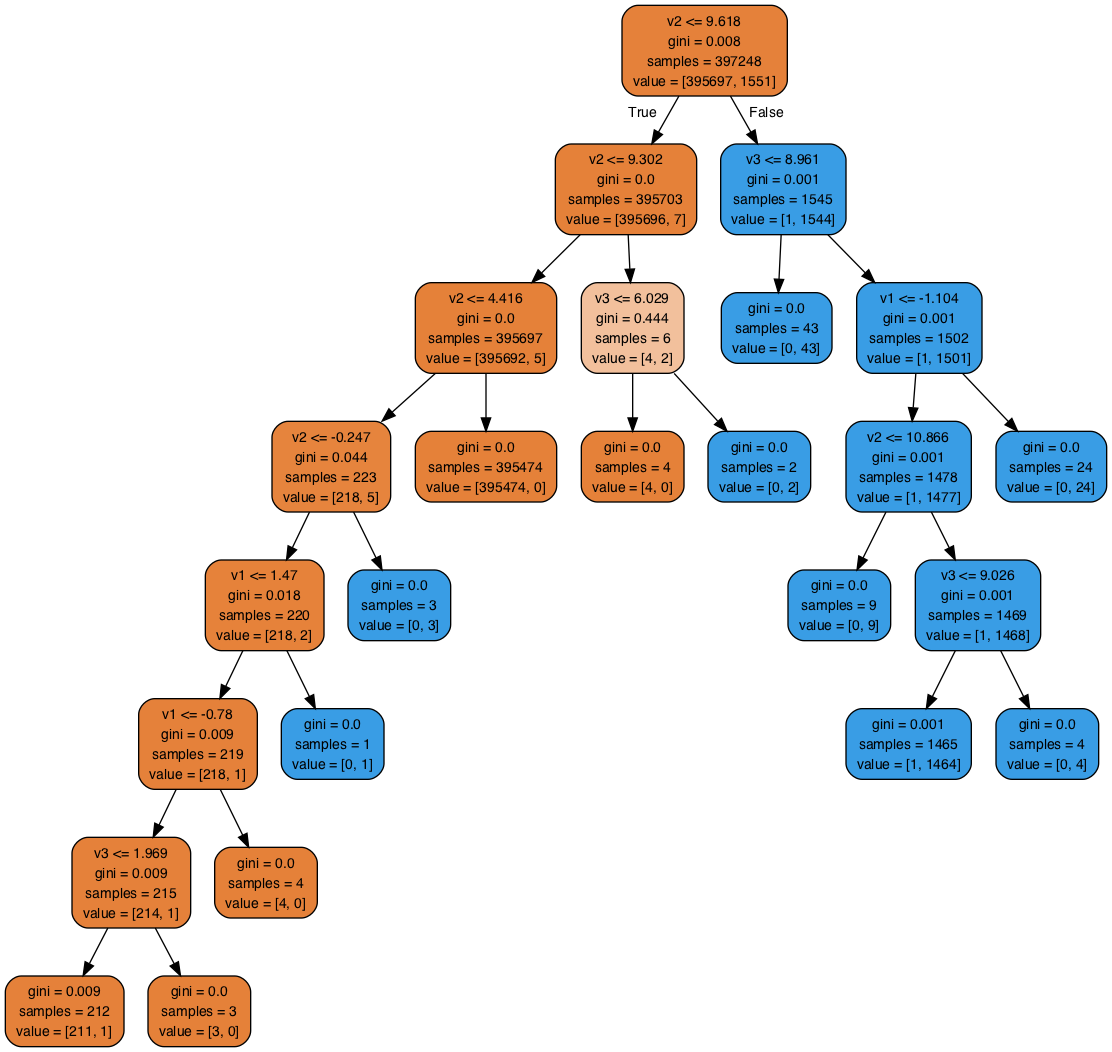

In [18]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [19]:
#Random Forest 

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
rfc_pred = rfc.predict(X_test)

In [22]:
print(confusion_matrix(y_test,rfc_pred))

[[169590      0]
 [     3    657]]


In [23]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    169590
          1       1.00      1.00      1.00       660

avg / total       1.00      1.00      1.00    170250

